## 함수화 하기

### 추천서비스 로직 만들기

(임시)


일단 데이터 프레임으로 존재한다면.  데이터가 완성되기 전까지 

주식의 종가 = 암호화폐 종가

주식의 거례량 = SNS 감정지수

(각코인별)



날짜 - 시세, 감정지수()

### 구상 지표 만들기
- 필요 정보
날짜별 - 시세, 감정지수()

- 추천기준이되는 정보

개인의 투자 기간 n = 예)1주/1달/3달/6달  <--- 주식과 달리 7일,   n= 7,30,90,180

주기는 2*n 로 평균이동선 측정. 왜냐면 저점에서 고점에 판다라고 생각(주기의 반)  그누구도 고점에사서 고점에 팔지 않기 때문

함수가 필요한 평균이동선 = 2*n

**감정지수 마찬가지

- 결국 이동평균선에 따라 z밸류를 각각 구하고 그 평균을 저장


### 구상-지표로 분류 순번 지정
z밸류를 제곱하여 기간에 의해 평균을 낸다. 

- 어느범위의 값들을 제곱루트평균낼지 지정 
- 이 값들을 새로운 하나의 테이블로 구성시킨다.
- 순위를 부여한다.

### 구상-순번 지정값에 의거해서 추천 로직, 아웃풋 까지

- 순위에따라 가상의 순서를 부여받은 것을 추천로직의 인풋에따라 함수를 지나 점수를 받는다.
- 함수는 우상,중앙 볼록한,우하
- 최종적으로 최고의 점수를 갖는 암호화패(주식을) 분류 할수 있다.
- 그리고 그 것을 아웃풋한다.

### 추천 로직 - 함수
-함수는 위로 뽀족한 절대값 함수
-고객이 원하는 지점이 가장 높게 만든다 인풋에 의해 변할 수 있게

## I. 패키지 밎 자료 불러오기

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import operator

### 1) 나중에 데이터베이스 커리해서 가져오기

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls -l '/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/C.csv'

-rw------- 1 root root 165058 Nov  8 06:32 '/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/C.csv'


In [10]:
AAPL = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/AAPL.csv')
BABA = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/BABA.csv',encoding='cp949')
C = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/C.csv', encoding='cp949')
INTC = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/INTC.csv', encoding='cp949')
MSFT = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/MSFT.csv')
# TSLA = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/TSLA.csv')
UGL = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/UGL.csv', encoding='cp949')
WFC = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/WFC.csv', encoding='cp949')

In [11]:
AAPL.head()

,일자,시가,고가,저가,종가,BB_상한선,거래량
0,20211105,151.890,152.20,150.06,151.28,155.3499,"65,463,883"
1,20211104,151.580,152.43,150.64,150.96,155.2323,"60,394,616"
2,20211103,150.390,151.97,149.82,151.49,155.1252,"54,511,534"
3,20211102,148.660,151.57,148.65,150.02,154.9967,"69,121,987"
4,20211101,148.985,149.70,147.80,148.96,154.9146,"74,588,258"


### 2) 변수 정의

In [7]:
#n = 개인의 1회 투자 기간
#stocks = 주식(암호화폐)의 종류
#bounds = 참조해야할 범위 <- 질문: 최근 몃달(혹은년) 범위의 통계를 보시겠습니까?
n = [7,30,90,180]
stocks = [AAPL,BABA,C,INTC,MSFT,UGL,WFC]
stocks_name = ['AAPL','BABA','C','INTC','MSFT','UGL','WFC']
bounds = [7,30,180,360,720]

## -------------여기까지 DB 데이터 불러오기

In [13]:
for j in stocks :
  for i in n:
    j['이동평균{0}일'.format(i)]= j['종가'].rolling(window=i).mean().shift(-(i-1))

for j in stocks:
  for i in n :
    j['이동평균{0}일표준편차'.format(i)]= j['종가'].rolling(window=i).std().shift(-(i-1))
  for i in n :
    j['이동평균{0}일z밸류'.format(i)] = (j['종가']-j['이동평균{0}일'.format(i)])/(j['이동평균{0}일표준편차'.format(i)])

for j in stocks:
  for i in n :
    j['이동평균{0}일z밸류제곱'.format(i)] = j['이동평균{0}일z밸류'.format(i)]**2

DF = dict()
for l,k in zip(stocks_name,stocks):
  for j in n:
    for i in bounds:
       DF['{2};MA{1};bounds{0};'.format(i,j,l)] = np.sqrt(k['이동평균{0}일z밸류제곱'.format(j)][0:i].mean())

for k in n:
  for j in bounds :

    DFX = []

    for i in DF.keys():
      if i.find('bounds{0};'.format(j)) >= 0:
        if i.find('MA{0};'.format(k)) >= 0 :

          a = i.split(';')[0]
          b = i.split(';')[1]
          c = i.split(';')[2]
          d = DF.get(i)
          data = [a,b,c,d]
          DFX.append(data)
          dfx = pd.DataFrame(DFX)
          dfx.columns = ['stocks','MA','bounds','z_value']
          dfx['z_value_rank']=dfx['z_value'].rank(method='max')
          dfx.to_csv('/content/drive/MyDrive/Colab Notebooks/datasets/test/MA{0}_bounds{1}_.csv'.format(k,j), index =False)


## ----------------여기까지 가공데이터 적재

## VI. 함수 정의

절대값함수 상하반전, 극점을 고객이 원하는 위치

### 1) 일반함수
- y = -abs(x-a)+b
- b는 주식(암호와폐의 수)
- a는 고객이 원하는 성향선택지(상중하 등 변화폭 원하는지)

In [ ]:
b = len(stocks)

In [ ]:
#성향선택지 - 일단 4분류
a0 = b*0
a1 = b*0.33
a2 = b*0.66
a3 = b*1

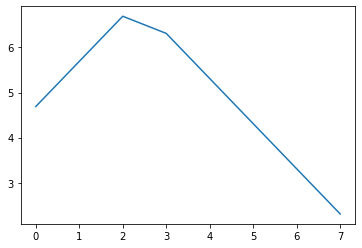

In [ ]:
x = [0,1,2,3,4,5,6,7]
y = []
for i in x:
  Y = -abs(i-a1) + b
  y.append(Y)
plt.plot(x,y)
plt.show()

### 2) 예제 데이터 일반함수에 적용

- (인풋이) 30일동안 수익내고 싶은 고객이 360일 통계를 보고 싶다.
- (인풋이) 가격폭이 중상의 주식(암호화폐)를 추천 받고싶다

In [ ]:
# input의 예
input_n = 30
input_bounds = 360
input_price_amplitude_level = a3

In [ ]:
input_price_amplitude_level

7

In [32]:
#함수 정의
def amplitude_level_output_ranking(zvalue,alevel):
  Ranking = -abs(zvalue-alevel) + len(stocks)
  return Ranking

In [17]:
def input_n_bounds_output_DF(n,bounds):
  out_DF = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/test/MA{0}_bounds{1}_.csv'.format(n,bounds))
  return out_DF


In [20]:
# input_n_bounds_output_DF(30,360)

In [21]:
#여기서 z_value_rank 가 함수의 x 값 그리고 높은 y 값으로 고객한테 추천
# out_DF

In [ ]:
for i in out_DF['z_value_rank']:
  print(y(i,input_amplitude_level))

7.0
5.0
2.0
4.0
6.0
1.0
3.0


### 3) 최종 점수판 정의


In [48]:
def input_n_bounds_alevel_output_stocks(n,bounds,input_amplitude_level):
  out_DF = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/test/MA{0}_bounds{1}_.csv'.format(n,bounds))

  for j,i in zip(out_DF['stocks'],out_DF['z_value_rank']):
    # print(j,y(i,input_amplitude_level))
    coustomer_finalscore[j] = amplitude_level_output_ranking(i,input_amplitude_level)
    out_put = max(coustomer_finalscore,key=coustomer_finalscore.get)
    # print(out_put)
  
  return out_put

In [58]:
input_n_bounds_alevel_output_stocks(30,360, 9/9)

'UGL'

### --- 함수 초본 완성---